## Part 1: Pulse Rate Algorithm

### Contents
Fill out this notebook as part of your final project submission.

**You will have to complete both the Code and Project Write-up sections.**
- The [Code](#Code) is where you will write a **pulse rate algorithm** and already includes the starter code.
   - Imports - These are the imports needed for Part 1 of the final project. 
     - [glob](https://docs.python.org/3/library/glob.html)
     - [numpy](https://numpy.org/)
     - [scipy](https://www.scipy.org/)
- The [Project Write-up](#Project-Write-up) to describe why you wrote the algorithm for the specific case.


### Dataset
You will be using the **Troika**[1] dataset to build your algorithm. Find the dataset under `datasets/troika/training_data`. The `README` in that folder will tell you how to interpret the data. The starter code contains a function to help load these files.

1. Zhilin Zhang, Zhouyue Pi, Benyuan Liu, ‘‘TROIKA: A General Framework for Heart Rate Monitoring Using Wrist-Type Photoplethysmographic Signals During Intensive Physical Exercise,’’IEEE Trans. on Biomedical Engineering, vol. 62, no. 2, pp. 522-531, February 2015. Link

-----

### Code

In [1]:
import glob

import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import scipy.signal

from matplotlib import pyplot as plt

In [2]:
def LoadTroikaDataset():
    """
    Retrieve the .mat filenames for the troika dataset.

    Review the README in ./datasets/troika/ to understand the organization of the .mat files.

    Returns:
        data_fls: Names of the .mat files that contain signal data
        ref_fls: Names of the .mat files that contain reference data
        <data_fls> and <ref_fls> are ordered correspondingly, so that ref_fls[5] is the 
            reference data for data_fls[5], etc...
    """
    data_dir = "./datasets/troika/training_data"
    data_fls = sorted(glob.glob(data_dir + "/DATA_*.mat"))
    ref_fls = sorted(glob.glob(data_dir + "/REF_*.mat"))
    return data_fls, ref_fls

def LoadTroikaDataFile(data_fl):
    """
    Loads and extracts signals from a troika data file.

    Usage:
        data_fls, ref_fls = LoadTroikaDataset()
        ppg, accx, accy, accz = LoadTroikaDataFile(data_fls[0])

    Args:
        data_fl: (str) filepath to a troika .mat file.

    Returns:
        numpy arrays for ppg, accx, accy, accz signals.
    """
    data = sp.io.loadmat(data_fl)['sig']
    return data[2:]

def AggregateErrorMetric(pr_errors, confidence_est):
    """
    Computes an aggregate error metric based on confidence estimates.

    Computes the MAE at 90% availability. 

    Args:
        pr_errors: a numpy array of errors between pulse rate estimates and corresponding 
            reference heart rates.
        confidence_est: a numpy array of confidence estimates for each pulse rate
            error.

    Returns:
        the MAE at 90% availability
    """
    # Higher confidence means a better estimate. The best 90% of the estimates
    #    are above the 10th percentile confidence.
    percentile90_confidence = np.percentile(confidence_est, 10)

    # Find the errors of the best pulse rate estimates
    best_estim0tes = pr_errors[confidence_est >= percentile90_confidence]

    # Return the mean absolute error
    return np.mean(np.abs(best_estimates))

def Evaluate():
    """
    Top-level function evaluation function.

    Runs the pulse rate algorithm on the Troika dataset and returns an aggregate error metric.

    Returns:
        Pulse rate error on the Troika dataset. See AggregateErrorMetric.
    """
    # Retrieve dataset files
    data_fls, ref_fls = LoadTroikaDataset()
    errs, confs = [], []
    for data_fl, ref_fl in zip(data_fls, ref_fls):
        # Run the pulse rate algorithm on each trial in the dataset
        errors, confidence = RunPulseRateAlgorithm(data_fl, ref_fl)
        errs.append(errors)
        confs.append(confidence)
        # Compute aggregate error metric
    errs = np.hstack(errs)
    confs = np.hstack(confs)
    return AggregateErrorMetric(errs, confs)

def RunPulseRateAlgorithm(data_fl, ref_fl):
    # Load data using LoadTroikaDataFile
    ppg, accx, accy, accz = LoadTroikaDataFile(data_fl)
    
    # Compute pulse rate estimates and estimation confidence.

    # Return per-estimate mean absolute error and confidence as a 2-tuple of numpy arrays.
    errors, confidence = np.ones(100), np.ones(100)  # Dummy placeholders. Remove
    return errors, confidence

def BandpassFilter(signal, fs=125):
    lowPass = 40/60
    highPass = 240/60
    b, a = sp.signal.butter(3, (lowPass, highPass), btype='bandpass', fs=fs)
    return sp.signal.filtfilt(b, a, signal)

In [3]:
fs = 125
data_files, ref_files = LoadTroikaDataset()

In [4]:
print(len(data_files))
print(len(ref_files))

12
12


In [5]:
data_files

['./datasets/troika/training_data/DATA_01_TYPE01.mat',
 './datasets/troika/training_data/DATA_02_TYPE02.mat',
 './datasets/troika/training_data/DATA_03_TYPE02.mat',
 './datasets/troika/training_data/DATA_04_TYPE01.mat',
 './datasets/troika/training_data/DATA_04_TYPE02.mat',
 './datasets/troika/training_data/DATA_05_TYPE02.mat',
 './datasets/troika/training_data/DATA_06_TYPE02.mat',
 './datasets/troika/training_data/DATA_07_TYPE02.mat',
 './datasets/troika/training_data/DATA_08_TYPE02.mat',
 './datasets/troika/training_data/DATA_10_TYPE02.mat',
 './datasets/troika/training_data/DATA_11_TYPE02.mat',
 './datasets/troika/training_data/DATA_12_TYPE02.mat']

In [6]:
ref_files

['./datasets/troika/training_data/REF_01_TYPE01.mat',
 './datasets/troika/training_data/REF_02_TYPE02.mat',
 './datasets/troika/training_data/REF_03_TYPE02.mat',
 './datasets/troika/training_data/REF_04_TYPE01.mat',
 './datasets/troika/training_data/REF_04_TYPE02.mat',
 './datasets/troika/training_data/REF_05_TYPE02.mat',
 './datasets/troika/training_data/REF_06_TYPE02.mat',
 './datasets/troika/training_data/REF_07_TYPE02.mat',
 './datasets/troika/training_data/REF_08_TYPE02.mat',
 './datasets/troika/training_data/REF_10_TYPE02.mat',
 './datasets/troika/training_data/REF_11_TYPE02.mat',
 './datasets/troika/training_data/REF_12_TYPE02.mat']

In [7]:
ref0 = sp.io.loadmat(ref_files[0])
print(len(ref0))

4


In [8]:
ref0.keys()

dict_keys(['__header__', '__version__', '__globals__', 'BPM0'])

In [9]:
print(ref0['__header__'])
print(ref0['__version__'])
print(ref0['__globals__'])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 12 01:00:33 2014'
1.0
[]


In [10]:
len(ref0['BPM0'])

148

In [11]:
ppg0, accx0, accy0, accz0 = LoadTroikaDataFile(data_files[0])

In [12]:
print(len(ppg0))
ppg0

37937


array([   4. ,    6. ,    3. , ...,   86. ,  104. ,  118.5])

In [13]:
print(len(accx0))
accx0

37937


array([-0.0702, -0.0702, -0.0546, ...,  0.4134,  0.4134,  0.4134])

In [14]:
print(len(accy0))
accy0

37937


array([ 0.3432,  0.3588,  0.3666, ..., -0.2808, -0.273 , -0.273 ])

In [15]:
print(len(accz0))
accz0

37937


array([ 0.9594,  0.9438,  0.936 , ...,  0.7254,  0.7176,  0.7254])

In [16]:
def plot_signal(signal, filtered_signal, fs):
    T = len(signal)/fs
    ts = np.arange(len(signal))/fs
   
    plt.figure(1)
    plt.figure(figsize=(16,4))
    plt.title('Raw Signal')
    plt.plot(ts, signal)    

    plt.figure(2)
    plt.figure(figsize=(16,4))
    plt.plot(ts, filtered_signal)
    plt.title('Filtered Signal')

    plt.figure(3)
    plt.figure(figsize=(16,4))
    plt.plot(np.fft.rfftfreq(len(signal), 1/fs), np.abs(np.fft.rfft(signal)))
    plt.title('Fourier Transform')
    
    plt.figure(4)
    plt.figure(figsize=(16,6))
    plt.title('Spectrogram - Raw Signal')
    plt.specgram(signal, Fs=fs, NFFT=250, noverlap=125, xextent=((0, T)))
    plt.xlabel('Time (sec)')
    plt.ylabel('Frequency (Hz)')

    plt.figure(5)
    plt.figure(figsize=(16,6))
    plt.title('Spectrogram - Filtered Signal')
    plt.specgram(filtered_signal, Fs=fs, NFFT=250, noverlap=125, xextent=((0, T)))
    plt.xlabel('Time (sec)')
    plt.ylabel('Frequency (Hz)')

In [17]:
def plot_fourier(signal, filtered_signal, fs):
    T = len(signal)/fs
    ts = np.arange(len(signal))/fs

    freq = np.fft.rfftfreq(len(signal), 1/fs)
    fft = np.fft.rfft(signal)

    plt.figure(1)
    plt.figure(figsize=(16,4))
    plt.plot(np.fft.rfftfreq(len(signal), 1/fs), np.abs(np.fft.rfft(signal)))
    plt.title('Fourier Transform')
    
    return fft, freq

In [18]:
def plot_ppg_peaks(signal,):
    fs=125
    T = len(signal)/fs
    ts = np.arange(len(signal))/fs
    signal = BandpassFilter(signal, fs=fs)
    
    peaks = sp.signal.find_peaks(signal)[0]
    plt.figure(figsize=(16,6))
    plt.plot(ts, signal)
    plt.plot(ts[peaks], signal[peaks], 'r.', ms=5)
    return peaks


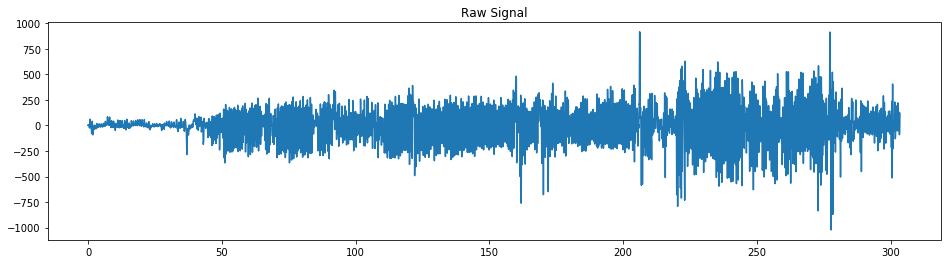

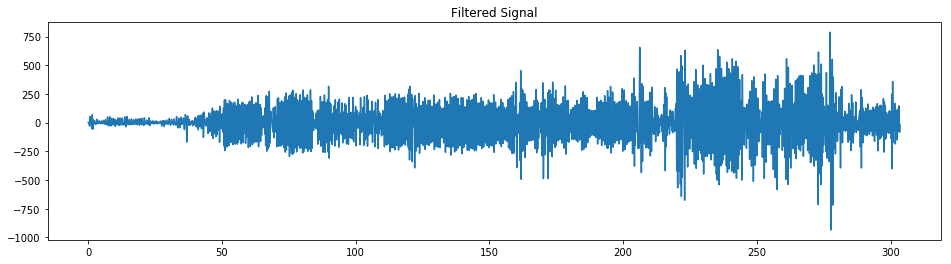

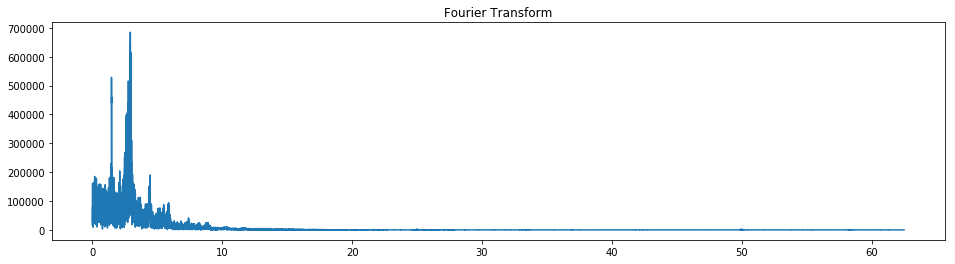

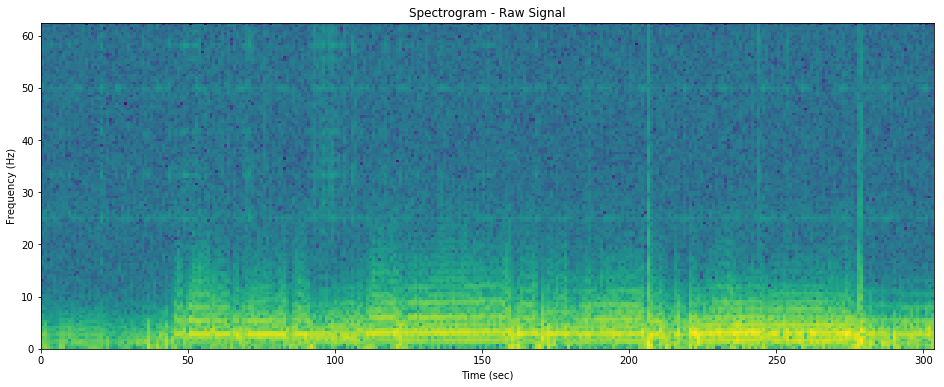

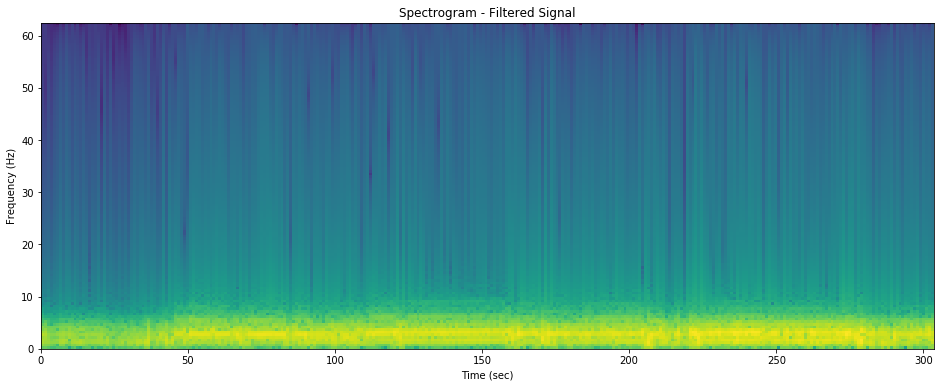

In [19]:
filtered_sig = BandpassFilter(ppg0, fs=fs)
plot_signal(ppg0, filtered_sig, fs=125)

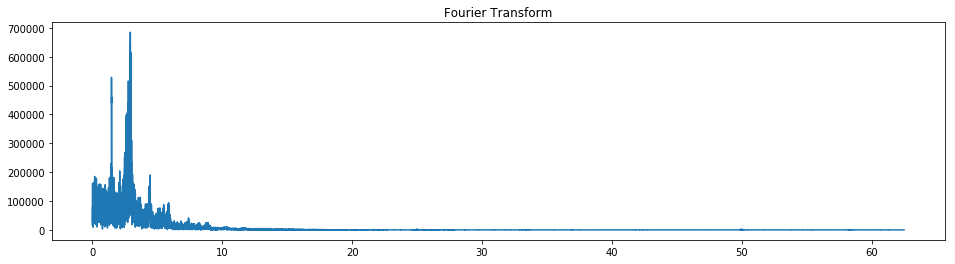

In [20]:
fft, freq = plot_fourier(ppg0, filtered_sig, fs=125)

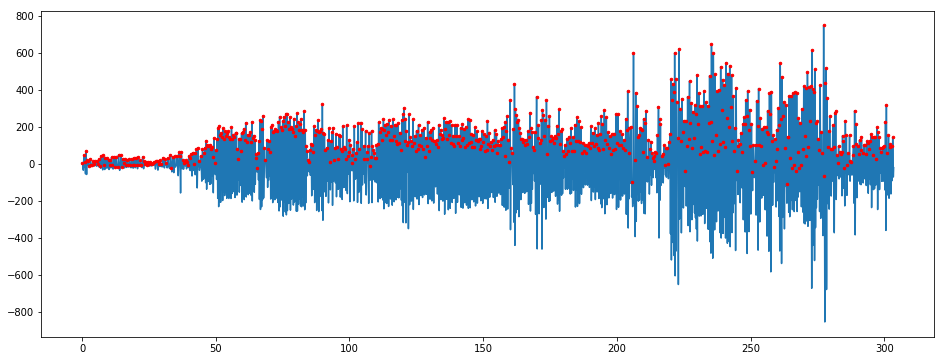

In [21]:
pks = plot_ppg_peaks(filtered_sig)

In [22]:
len(pks)

809

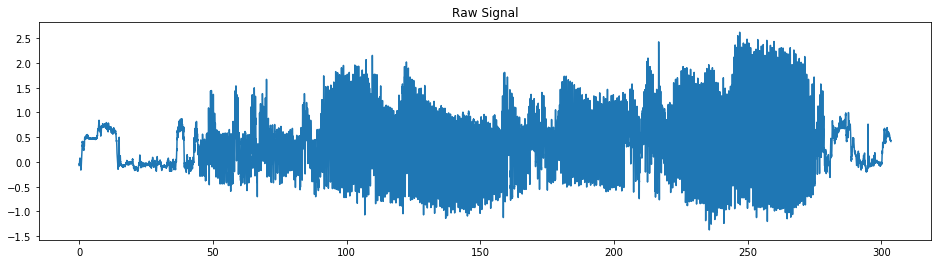

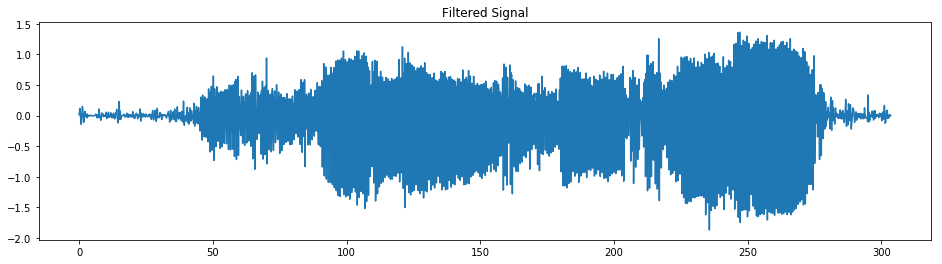

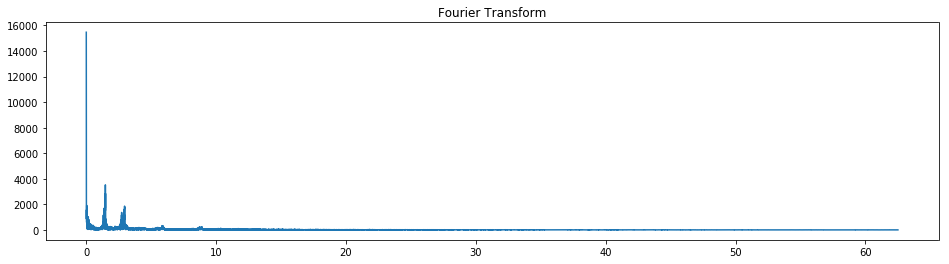

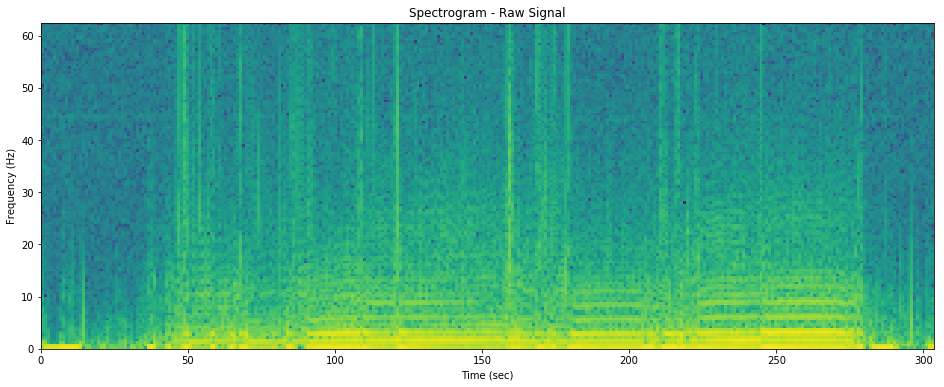

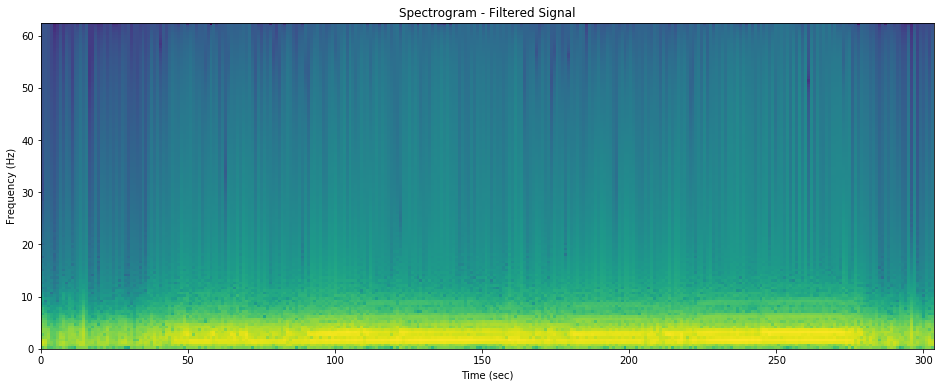

In [23]:
filtered_sig = BandpassFilter(accx0, fs=fs)
plot_signal(accx0, filtered_sig, fs=125)

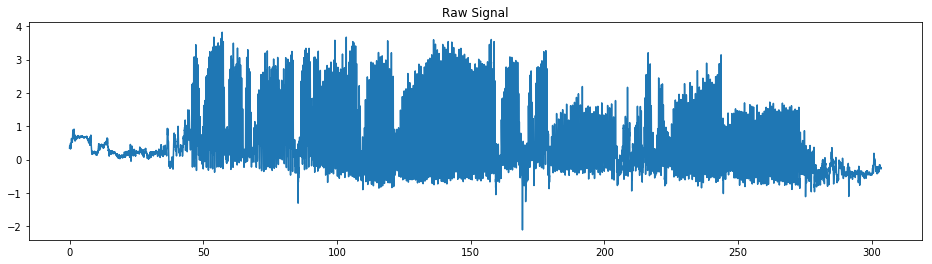

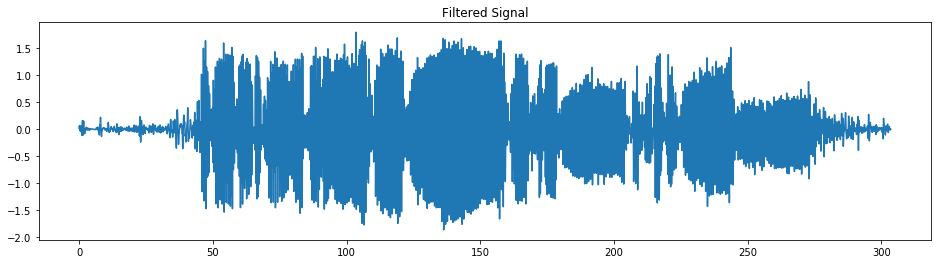

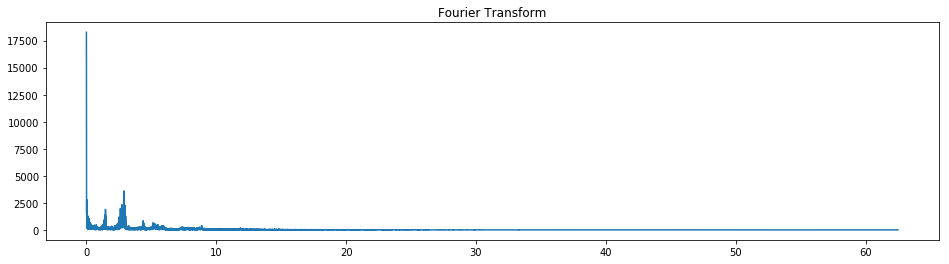

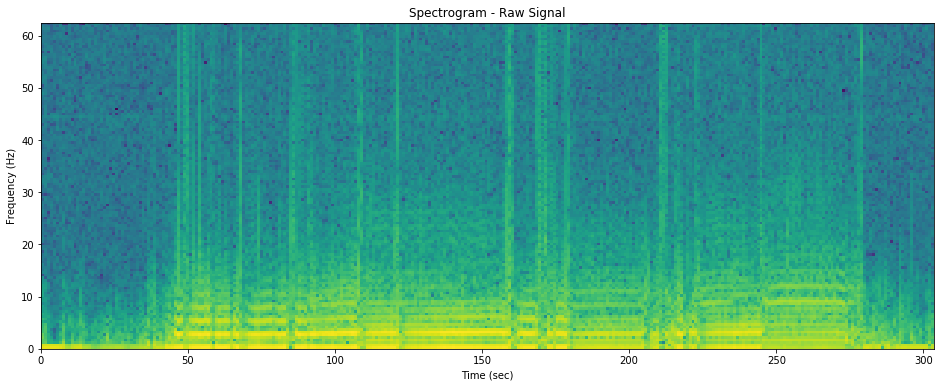

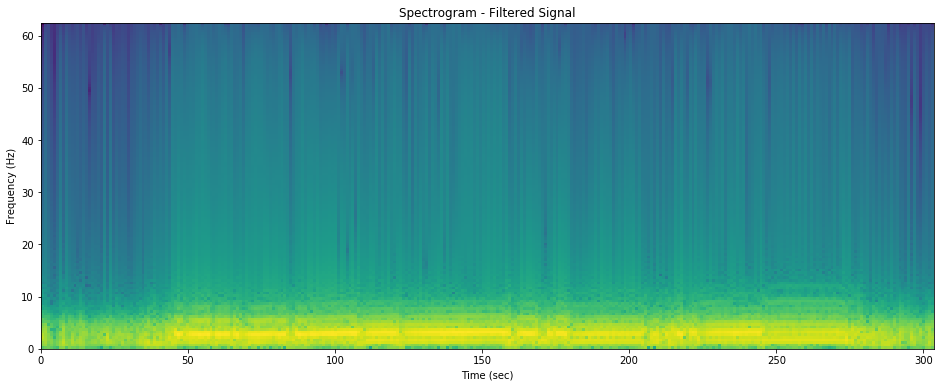

In [24]:
filtered_sig = BandpassFilter(accy0, fs=fs)
plot_signal(accy0, filtered_sig, fs=125)

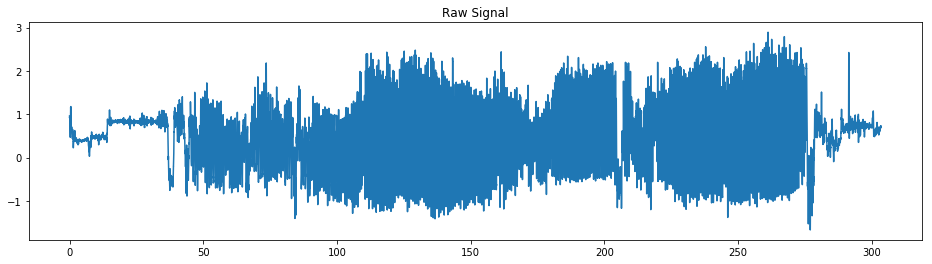

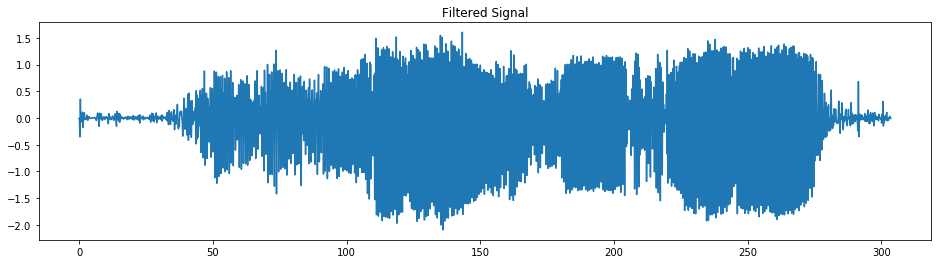

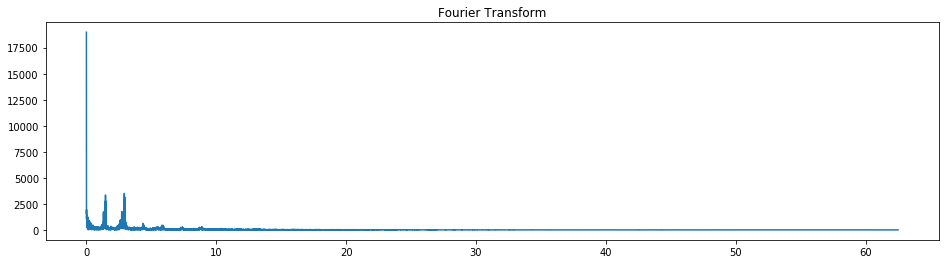

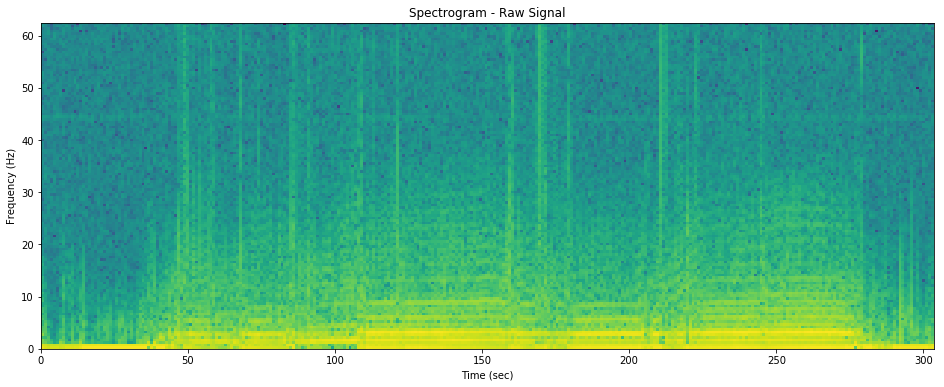

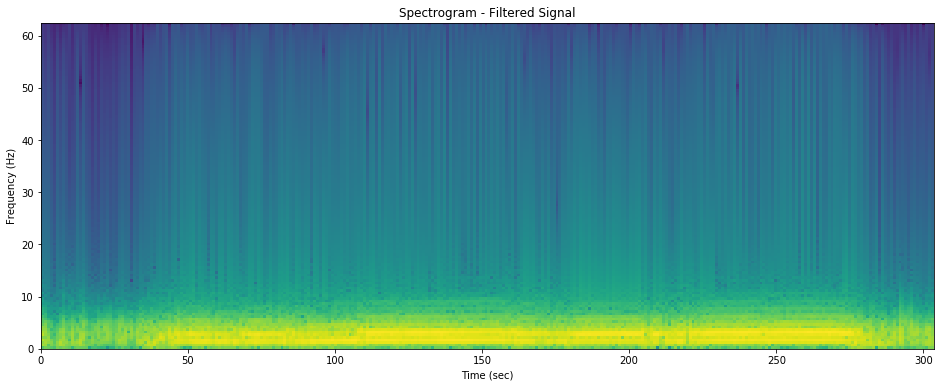

In [25]:
filtered_sig = BandpassFilter(accz0, fs=fs)
plot_signal(accz0, filtered_sig, fs=125)

In [26]:
ppg6, accx6, accy6, accz6 = LoadTroikaDataFile(data_files[6])
ref6 = sp.io.loadmat(ref_files[6])

In [27]:
print(len(ppg6))
print(len(accx6))
print(len(accy6))
print(len(accz6))

38373
38373
38373
38373


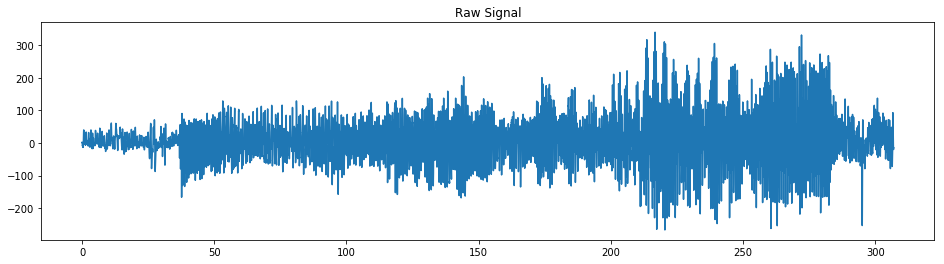

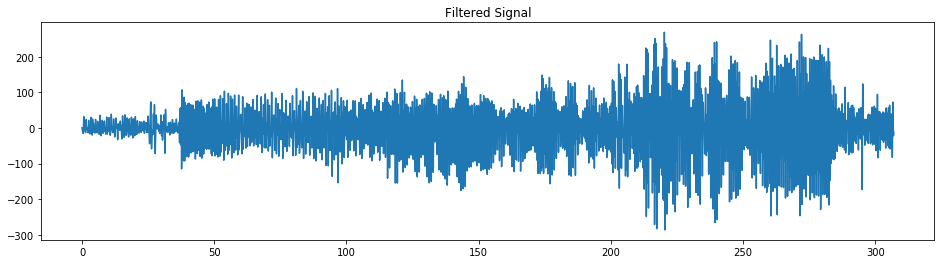

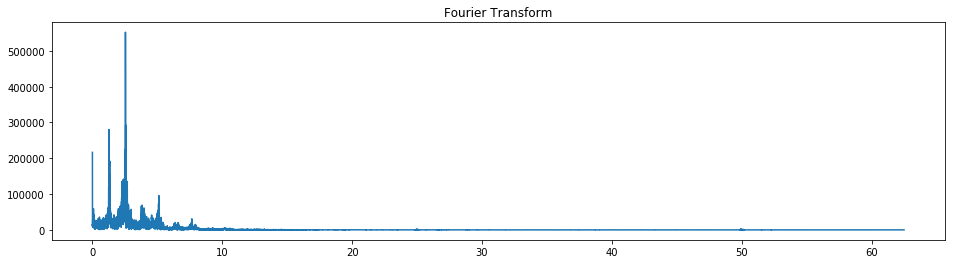

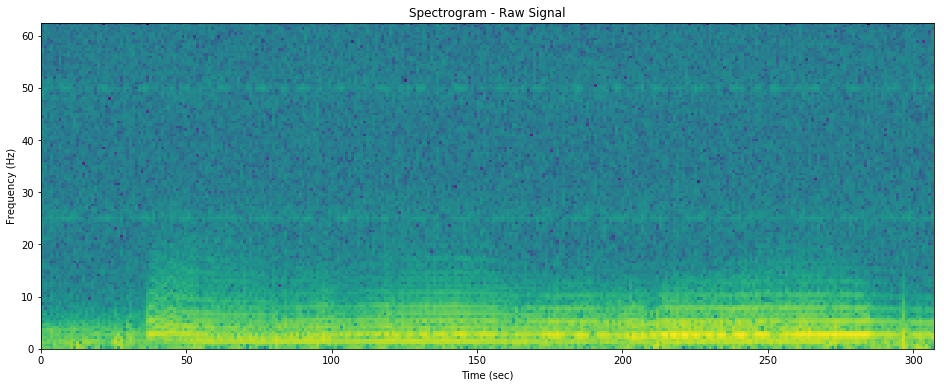

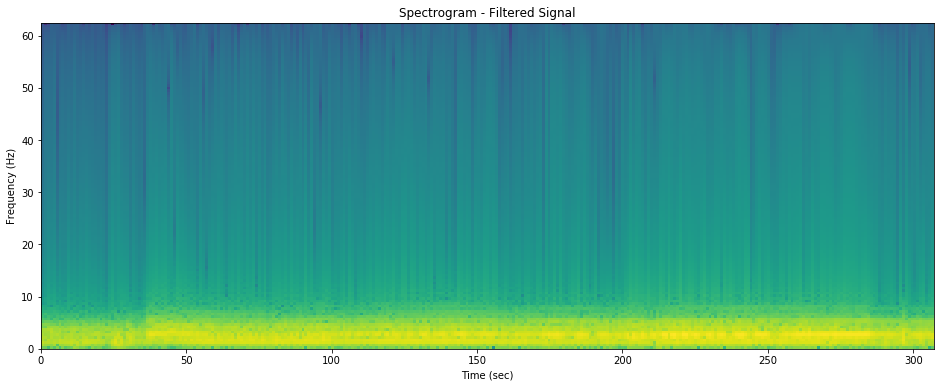

In [28]:
filtered_sig = BandpassFilter(ppg6, fs=fs)
plot_signal(ppg6, filtered_sig, fs=125)

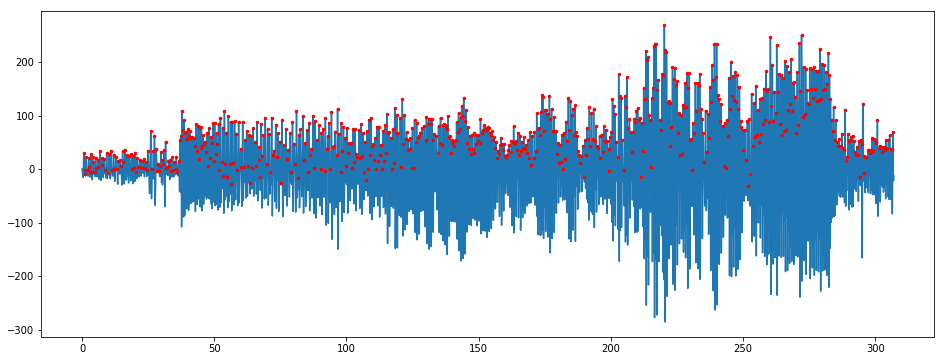

In [29]:
pks = plot_ppg_peaks(filtered_sig)

In [30]:
len(pks)

738

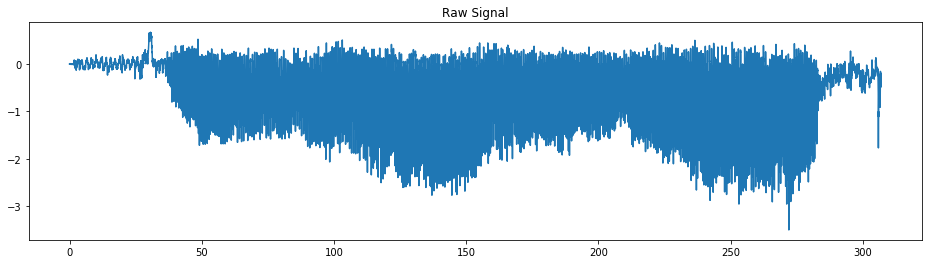

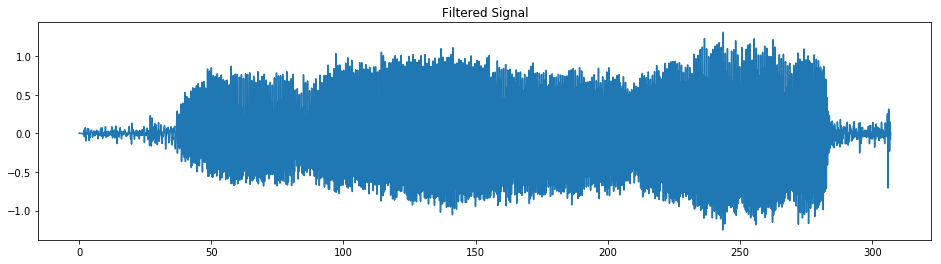

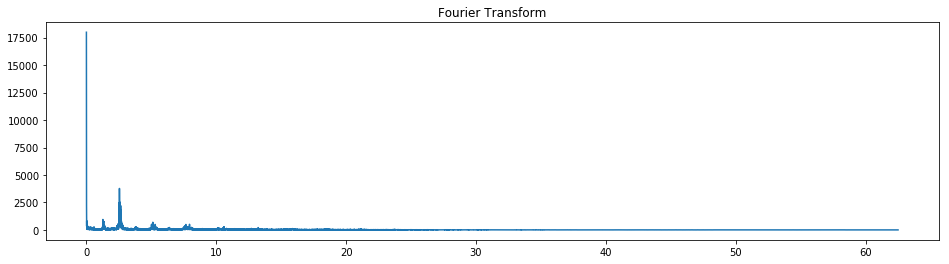

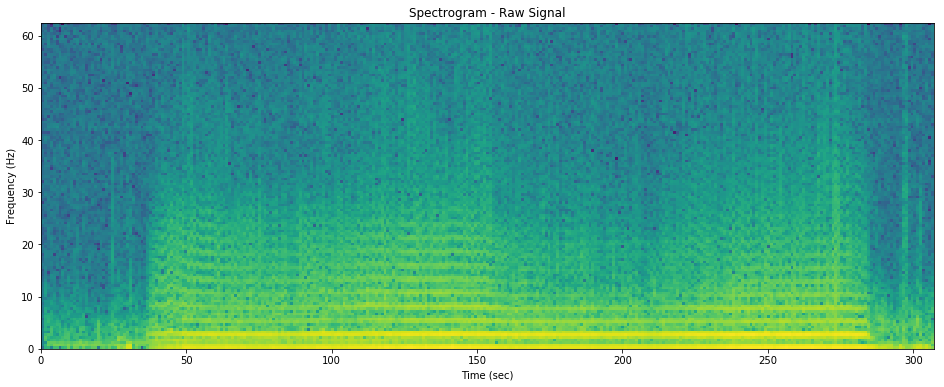

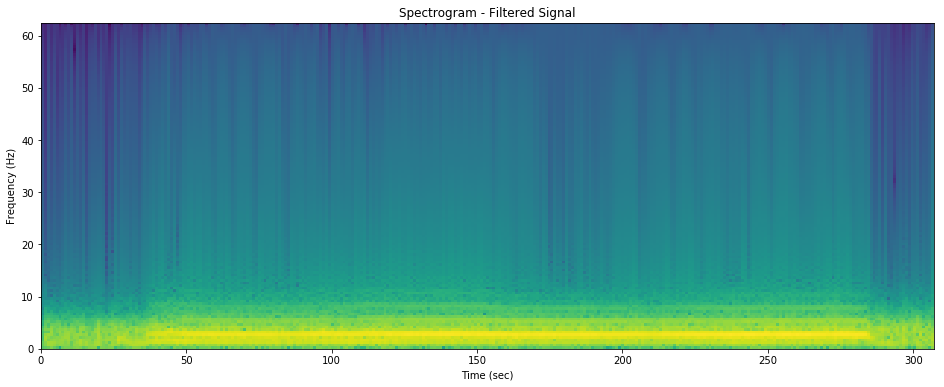

In [31]:
filtered_sig = BandpassFilter(accx6, fs=fs)
plot_signal(accx6, filtered_sig, fs=125)

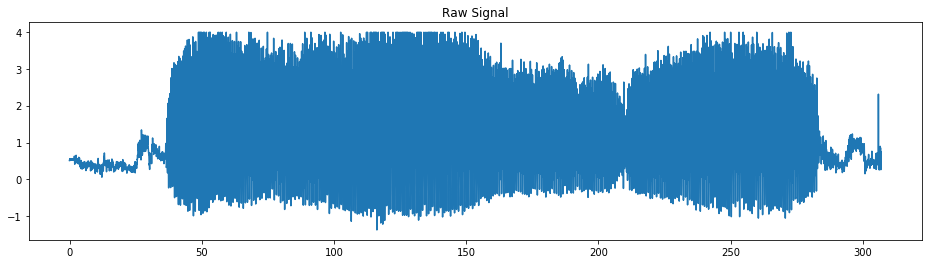

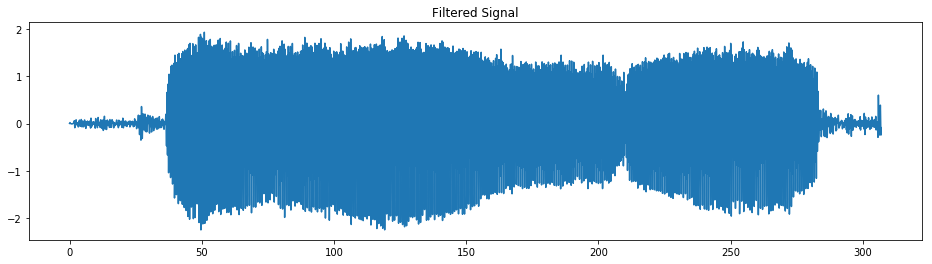

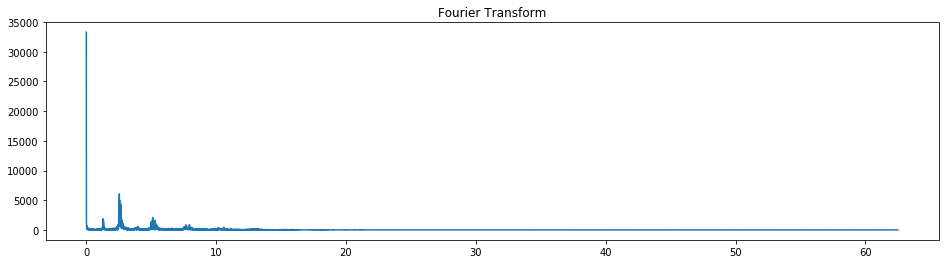

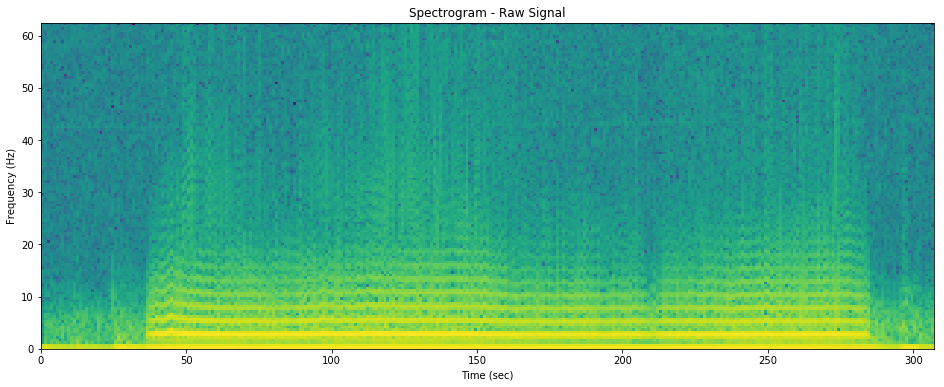

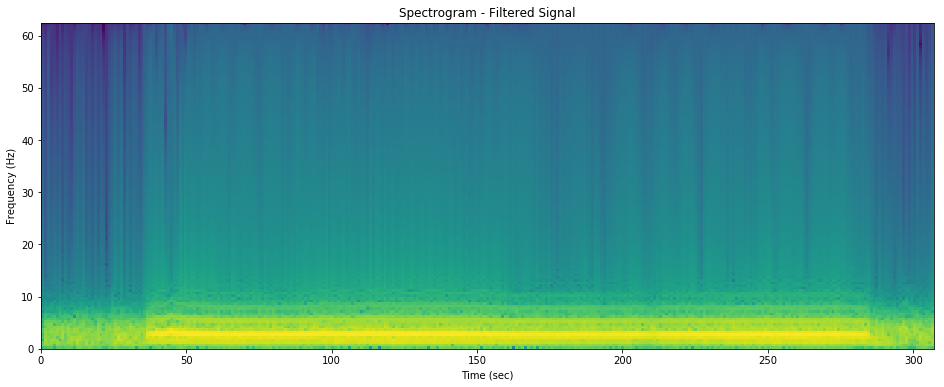

In [32]:
filtered_sig = BandpassFilter(accy6, fs=fs)
plot_signal(accy6, filtered_sig, fs=125)

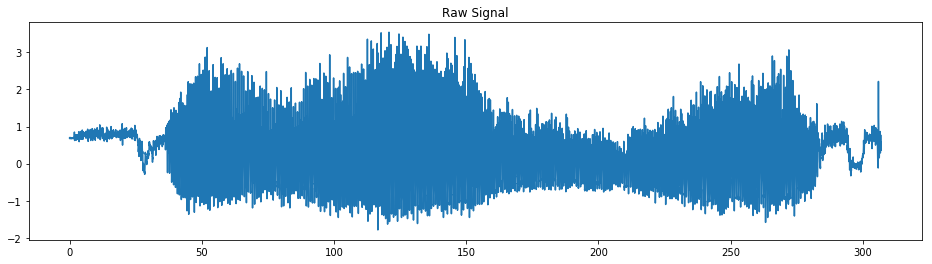

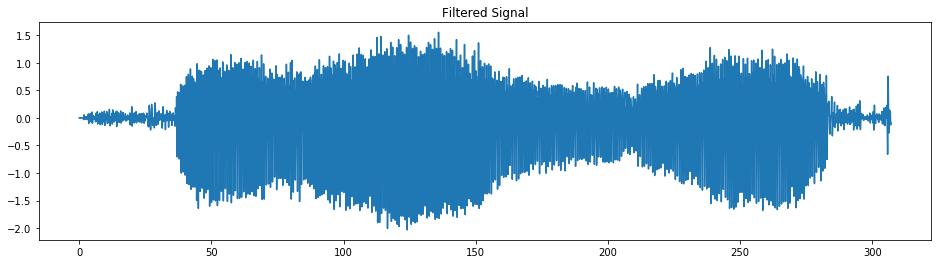

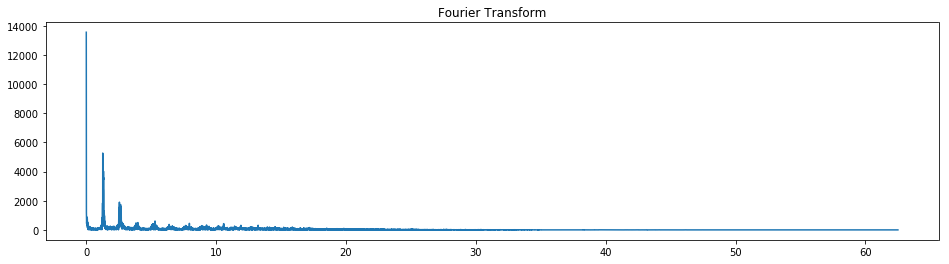

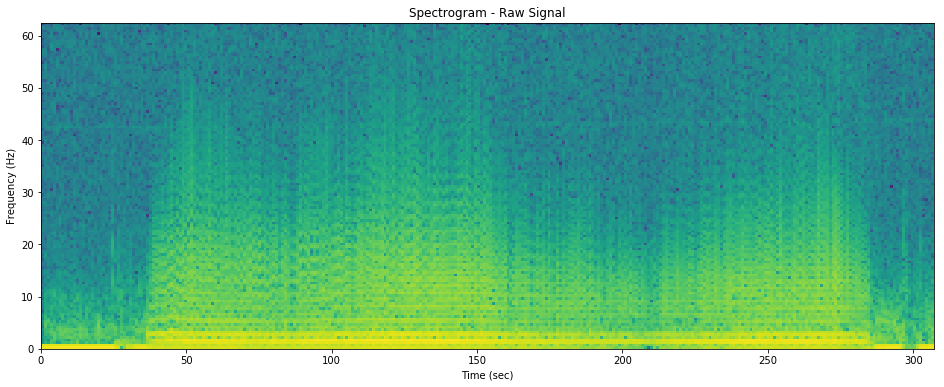

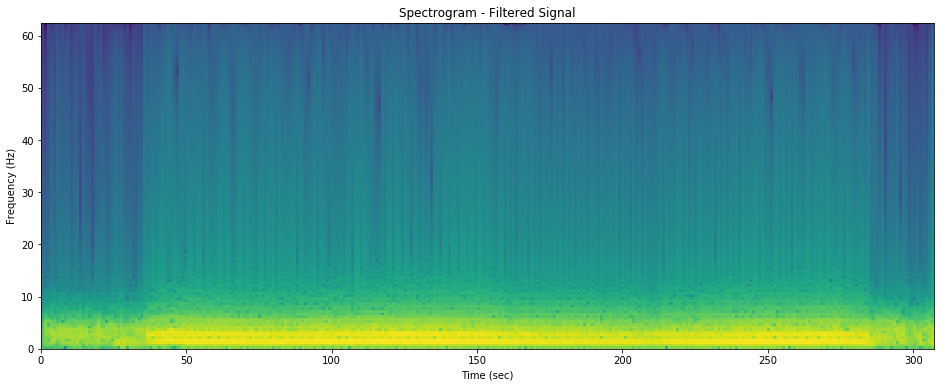

In [33]:
filtered_sig = BandpassFilter(accz6, fs=fs)
plot_signal(accz6, filtered_sig, fs=125)

In [34]:
def plot_acc_signal(accx, accy, accz):
    T = len(accx)/fs
    ts = np.arange(len(accx))/fs

    accx = BandpassFilter(accx)
    accy = BandpassFilter(accy)
    accz = BandpassFilter(accz)   
    
    plt.figure(figsize=(12,6))
    plt.clf()
    plt.plot(ts, accx, label='x')
    plt.plot(ts, accy, label='y')
    plt.plot(ts, accz, label='z')
    plt.legend()

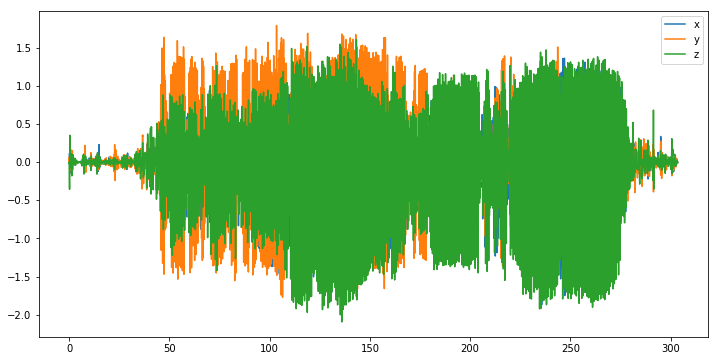

In [35]:
plot_acc_signal(accx0, accy0, accz0)

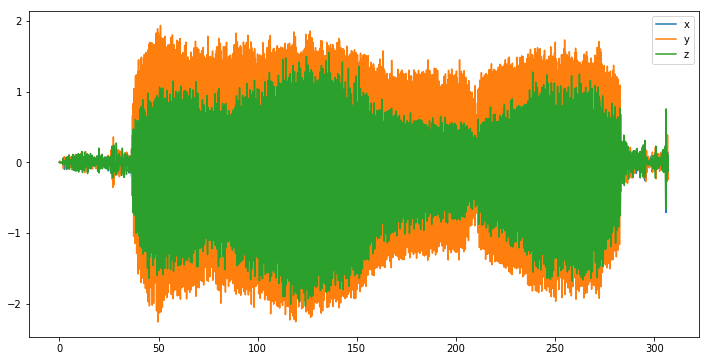

In [36]:
plot_acc_signal(accx6, accy6, accz6)

In [37]:
def plot_acc_segments(accx, accy, accz):
    T = len(accx)/fs
    ts = np.arange(len(accx))/fs

    accx = BandpassFilter(accx)
    accy = BandpassFilter(accy)
    accz = BandpassFilter(accz)   
    

    plt.figure(figsize=(10,6))
    plt.clf()
    plt.plot(ts[1000:4000], accx[1000:4000], label='x')
    plt.plot(ts[1000:4000], accy[1000:4000], label='y')
    plt.plot(ts[1000:4000], accz[1000:4000], label='z')
    plt.legend()

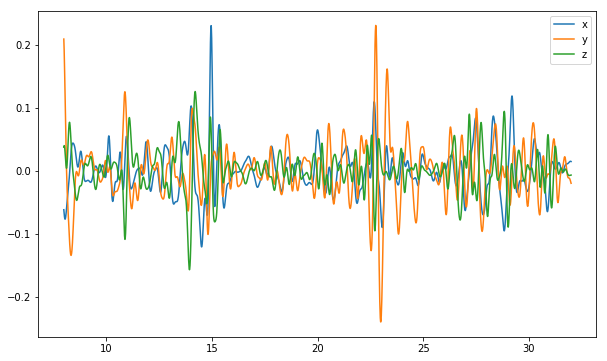

In [38]:
plot_acc_segments(accx0, accy0, accz0)

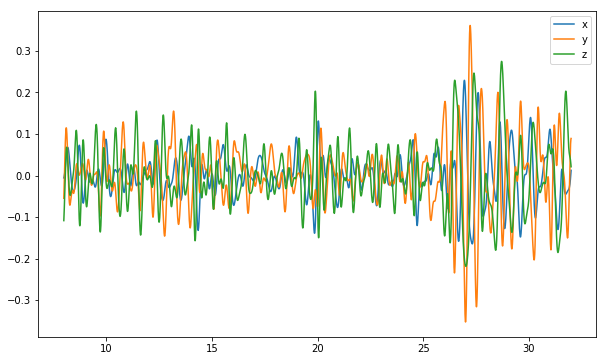

In [39]:
plot_acc_segments(accx6, accy6, accz6)

In [40]:
def plot_acc_mag( accx, accy, accz):
    T = len(accx)/fs
    ts = np.arange(len(accx))/fs
    accx = BandpassFilter(accx)
    accy = BandpassFilter(accy)
    accz = BandpassFilter(accz)
    acc_mag = np.sqrt(accx**2 + (accy - np.mean(accy))**2 + accz**2)
    #acc_mag = np.sqrt(accx**2 + accy**2 + accz**2)

    plt.figure(figsize=(10,6))
    plt.plot(ts, acc_mag, label='acc')
    plt.legend()

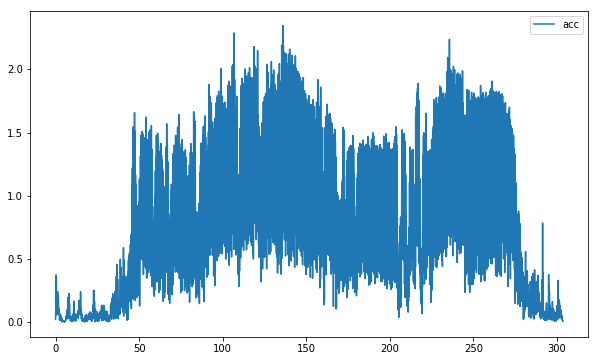

In [41]:
plot_acc_mag(accx0, accy0, accz0)

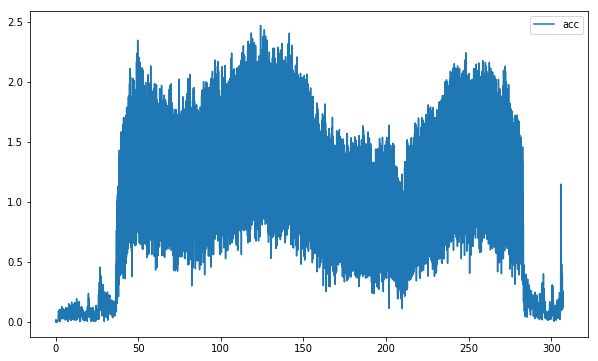

In [42]:
plot_acc_mag(accx6, accy6, accz6)

In [249]:
# def featurize(ppg, accx, accy, accz):
#     fs = 125
#     T = len(ppg)/fs/60
#     signal =  BandpassFilter(ppg)
# 
#     accx = BandpassFilter(accx)
#     accy = BandpassFilter(accy)
#     accz = BandpassFilter(accz)    
# 
#     # L2-Norms of acc
#     l2_acc = np.sqrt(accx**2 + (accy - np.mean(accy))**2 + accz**2)
# 
#     plt.figure(figsize=(10,6))
#     ppg_spec, ppg_freqs, t1, _ = plt.specgram(signal, NFFT= 8*fs, Fs=fs, noverlap= 6*fs, xextent= [0, T])
#     acc_spec, acc_freqs, t2, _ = plt.specgram(l2_acc, NFFT= 8*fs, Fs=fs , noverlap= 6*fs, xextent= [0, T])
# 
#     # max frequency for ppg as a feature
#     ppg_peaks = []
#     for i in range(len(t1)):
#         peak_p = np.argmax(ppg_spec[i:])
#         peak_a = np.argmax(acc_spec[i:])
#         ppg_peaks.append(peak_p)
# 
#     # max frequency for L2 norm of acc
#     acc_peaks = []
#     for i in range(len(t1)):
#         peak = np.argmax(acc_spec[i:])
#         acc_peaks.append(peak)
# 
#     return ppg_spec, ppg_freqs, ppg_peaks, acc_spec, acc_freqs, acc_peaks, t1, t2

In [250]:
def getpks(signal,fs):
    signal =  BandpassFilter(signal)
    freqs= np.fft.rfftfreq(len(signal), 1/fs)
    fourier= np.abs(np.fft.rfft(signal))
    pks = sp.signal.find_peaks(fourier)[0]
    
    Columns = ['Peak_Index', 'Freqs', 'Fourier_Peaks']    
    data = pd.DataFrame(columns = Columns)
    data['Peak_Index'] = pks
    data['Freqs'] = freqs[pks]
    data['Fourier_Peaks'] = fourier[pks]

    #peaks = []
    #herzs = []

    #for pik in pks:
    #    peaks.append(fourier[pik])

    #peaks = sorted(peaks)

    #for pik in peaks:
    #    herzs.append(freqs[np.where(fourier == pik)[0][0]])

    #peaks = peaks[::-1]
    #herzs = herzs[::-1]

    #return data, peaks, pks, herzs, fourier
    return data, fourier

In [251]:
def find_bpm(ppg_freq, acc_freq):
    n = 0
    bpm = 0
    if len(ppg_freq) > len(acc_freq):
        n = len(acc_freq)
    else:
        n = len(ppg_freq)
    
    for i in range(0, n):
        if ppg_freq[i] != acc_freq[i]:
            bpm = ppg_freq[i]*60
            break
            pass

    return bpm

In [252]:
signal = BandpassFilter(ppg0)
accx = BandpassFilter(accx0)
accy = BandpassFilter(accy0)
accz = BandpassFilter(accz0)

T = len(signal)/fs
l2_acc = np.sqrt(accx**2 + (accy - np.mean(accy))**2 + accz**2)
stft = []

ppg_seg = signal[1000:1250]
ppg_data, ppg_fourier = getpks(ppg_seg,fs)

acc_seg = l2_acc[1000:1250]
acc_data, acc_fourier = getpks(acc_seg,fs)


(0, 100)

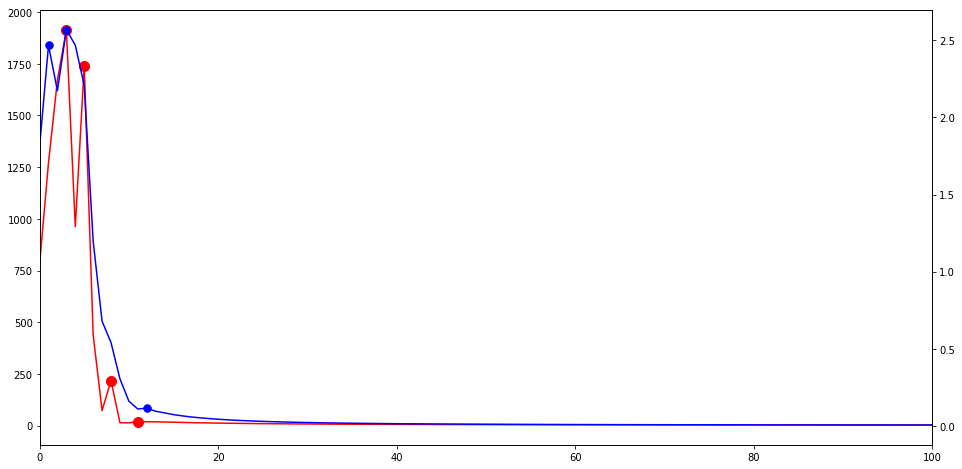

In [253]:
mpld3.disable_notebook()
plt.figure(figsize=(16,8))
plt.plot(ppg_fourier , "r", label='ppg')
plt.plot(ppg_data['Peak_Index'], ppg_fourier[ppg_data['Peak_Index']],  "r.", ms=20, label='ppg')
plt.twinx()
plt.plot(acc_fourier , "b",  label='acc')
plt.plot(acc_data['Peak_Index'], acc_fourier[acc_data['Peak_Index']],  "b.", ms=15, label='ppg')
plt.xlim(0, 100)

In [254]:
ppg = ppg_data.sort_values(by='Fourier_Peaks', ascending=False).reset_index(drop=True)

In [255]:
ppg

,Peak_Index,Freqs,Fourier_Peaks
0,3,1.5,1914.761850
1,5,2.5,1739.903218
2,8,4.0,217.888425
3,11,5.5,19.425982


In [256]:
acc = acc_data.sort_values(by='Fourier_Peaks', ascending=False).reset_index(drop=True)

In [257]:
acc

,Peak_Index,Freqs,Fourier_Peaks
0,3,1.5,2.569067
1,1,0.5,2.467260
2,12,6.0,0.114658


In [258]:
x = find_bpm(ppg['Freqs'], acc['Freqs'])

In [259]:
x

150.0

In [260]:
window_len = 1000
window_shift = 250
signal = BandpassFilter(ppg0)
accx = BandpassFilter(accx0)
accy = BandpassFilter(accy0)
accz = BandpassFilter(accz0)

T = len(signal)/fs
l2_acc = np.sqrt(accx**2 + (accy - np.mean(accy))**2 + accz**2)
freq = np.fft.rfftfreq(window_len, 1/fs)
calculated_bpm = []
n = 0
for i in range(0, len(signal)-window_len, window_shift):
    ppg_seg = signal[i:i + window_len]
    ppg_data, ppg_fourier = getpks(ppg_seg,fs)
    ppg = ppg_data.sort_values(by='Fourier_Peaks', ascending=False).reset_index(drop=True)
    
    acc_seg = l2_acc[i:i + window_len]
    acc_data, acc_fourier = getpks(acc_seg,fs)
    acc = acc_data.sort_values(by='Fourier_Peaks', ascending=False).reset_index(drop=True)
    
    bpm = find_bpm(ppg['Freqs'], acc['Freqs'])
    print(i, n, bpm)
    n += 1
    calculated_bpm.append(bpm)

0 0 75.0
250 1 75.0
500 2 75.0
750 3 75.0
1000 4 157.5
1250 5 67.5
1500 6 75.0
1750 7 75.0
2000 8 75.0
2250 9 75.0
2500 10 75.0
2750 11 82.5
3000 12 75.0
3250 13 67.5
3500 14 67.5
3750 15 67.5
4000 16 67.5
4250 17 67.5
4500 18 67.5
4750 19 82.5
5000 20 165.0
5250 21 165.0
5500 22 172.5
5750 23 157.5
6000 24 172.5
6250 25 75.0
6500 26 172.5
6750 27 172.5
7000 28 187.5
7250 29 105.0
7500 30 135.0
7750 31 142.5
8000 32 142.5
8250 33 142.5
8500 34 45.0
8750 35 112.5
9000 36 112.5
9250 37 112.5
9500 38 112.5
9750 39 172.5
10000 40 157.5
10250 41 157.5
10500 42 112.5
10750 43 150.0
11000 44 150.0
11250 45 120.0
11500 46 120.0
11750 47 120.0
12000 48 120.0
12250 49 127.5
12500 50 127.5
12750 51 127.5
13000 52 135.0
13250 53 165.0
13500 54 135.0
13750 55 135.0
14000 56 142.5
14250 57 142.5
14500 58 180.0
14750 59 90.0
15000 60 127.5
15250 61 82.5
15500 62 142.5
15750 63 202.5
16000 64 90.0
16250 65 90.0
16500 66 90.0
16750 67 90.0
17000 68 90.0
17250 69 60.0
17500 70 75.0
17750 71 90.0
18000 7

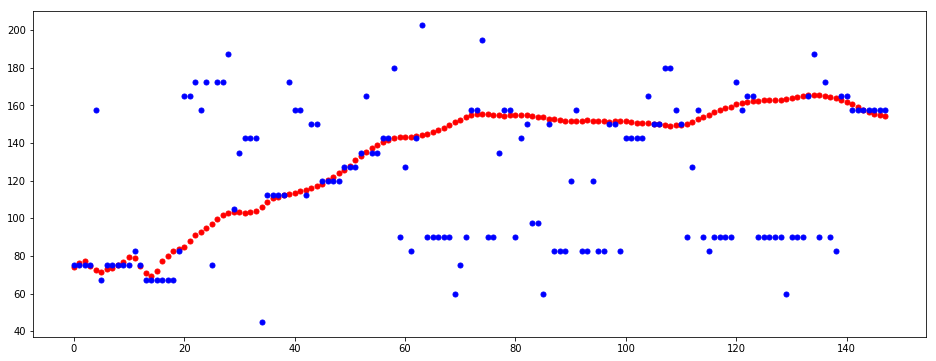

In [261]:
plt.figure(figsize=(16,6))
plt.plot(ref0['BPM0'], "r.", ms=10)
plt.plot(calculated_bpm, "b.", ms=10)

-----
### Project Write-up

Answer the following prompts to demonstrate understanding of the algorithm you wrote for this specific context.

> - **Code Description** - Include details so someone unfamiliar with your project will know how to run your code and use your algorithm. 
> - **Data Description** - Describe the dataset that was used to train and test the algorithm. Include its short-comings and what data would be required to build a more complete dataset.
> - **Algorithhm Description** will include the following:
>   - how the algorithm works
>   - the specific aspects of the physiology that it takes advantage of
>   - a describtion of the algorithm outputs
>   - caveats on algorithm outputs 
>   - common failure modes
> - **Algorithm Performance** - Detail how performance was computed (eg. using cross-validation or train-test split) and what metrics were optimized for. Include error metrics that would be relevant to users of your algorithm. Caveat your performance numbers by acknowledging how generalizable they may or may not be on different datasets.

Your write-up goes here...

-----
### Next Steps
You will now go to **Test Your Algorithm** to apply a unit test to confirm that your algorithm met the success criteria. 